# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

# Load the data


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_classes = 10
x_train = x_train[..., 0].reshape(-1, 32*32)
x_test = x_test[..., 0].reshape(-1, 32*32)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print('Train size:', x_train.shape[0])
print('Test size:', x_test.shape[0])

170500096/170498071 [==============================] - 249s 1us/step
Train size: 50000
Test size: 10000


# Build the network 

In [4]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(32*32,)))
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print(l.name, l.input_shape,'==>', l.output_shape)

print(model.summary())

dense (None, 1024) ==> (None, 256)
dense_1 (None, 256) ==> (None, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 264,970
Trainable params: 264,970
Non-trainable params: 0
_________________________________________________________________
None


# Train the network

Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 2.3388 - accuracy: 0.1792 - val_loss: 2.0720 - val_accuracy: 0.2394
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 2.0098 - accuracy: 0.2749 - val_loss: 1.9701 - val_accuracy: 0.3007
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 1.9366 - accuracy: 0.3001 - val_loss: 1.9080 - val_accuracy: 0.3127
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 1.8924 - accuracy: 0.3242 - val_loss: 1.8773 - val_accuracy: 0.3324
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.8482 - accuracy: 0.3424 - val_loss: 1.8109 - val_accuracy: 0.3647
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.8159 - accuracy: 0.3546 - val_loss: 1.8616 - val_accuracy: 0.3279
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 1.7924 - accuracy: 0.3624 - val_loss: 1.8116 - val_accuracy: 0.3534
Epoch 

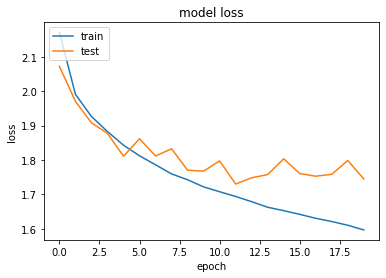

In [5]:
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Build networks using different number of layers

Epoch 1/200
391/391 [==============================] - 1s 2ms/step - loss: 2.2875 - acc: 0.1382 - val_loss: 2.1826 - val_acc: 0.1620
Epoch 2/200
391/391 [==============================] - 1s 2ms/step - loss: 2.1693 - acc: 0.1878 - val_loss: 2.0983 - val_acc: 0.2305
Epoch 3/200
391/391 [==============================] - 1s 2ms/step - loss: 2.1260 - acc: 0.2073 - val_loss: 2.0742 - val_acc: 0.2411
Epoch 4/200
391/391 [==============================] - 1s 2ms/step - loss: 2.1014 - acc: 0.2272 - val_loss: 2.0338 - val_acc: 0.2700
Epoch 5/200
391/391 [==============================] - 1s 1ms/step - loss: 2.0849 - acc: 0.2307 - val_loss: 2.0098 - val_acc: 0.2843
Epoch 6/200
391/391 [==============================] - 1s 1ms/step - loss: 2.0618 - acc: 0.2433 - val_loss: 2.0117 - val_acc: 0.2793
Epoch 7/200
391/391 [==============================] - 1s 1ms/step - loss: 2.0495 - acc: 0.2493 - val_loss: 1.9981 - val_acc: 0.2851
Epoch 8/200
391/391 [==============================] - 1s 1ms/step - 

391/391 [==============================] - 1s 1ms/step - loss: 1.9484 - acc: 0.2805 - val_loss: 1.8970 - val_acc: 0.3043
Epoch 63/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9452 - acc: 0.2820 - val_loss: 1.9001 - val_acc: 0.3058
Epoch 64/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9425 - acc: 0.2859 - val_loss: 1.9191 - val_acc: 0.3106
Epoch 65/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9400 - acc: 0.2864 - val_loss: 1.9148 - val_acc: 0.2988
Epoch 66/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9420 - acc: 0.2865 - val_loss: 1.9082 - val_acc: 0.3103
Epoch 67/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9384 - acc: 0.2847 - val_loss: 1.8883 - val_acc: 0.3114
Epoch 68/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9430 - acc: 0.2850 - val_loss: 1.9125 - val_acc: 0.3054
Epoch 69/200
391/391 [==============================] - 1s 1ms/step - loss:

391/391 [==============================] - 1s 1ms/step - loss: 1.9214 - acc: 0.2896 - val_loss: 1.8809 - val_acc: 0.3150
Epoch 124/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9144 - acc: 0.2948 - val_loss: 1.8978 - val_acc: 0.3082
Epoch 125/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9201 - acc: 0.2888 - val_loss: 1.8821 - val_acc: 0.3091
Epoch 126/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9256 - acc: 0.2851 - val_loss: 1.8917 - val_acc: 0.3165
Epoch 127/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9217 - acc: 0.2895 - val_loss: 1.8809 - val_acc: 0.3138
Epoch 128/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9157 - acc: 0.2927 - val_loss: 1.8864 - val_acc: 0.3153
Epoch 129/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9208 - acc: 0.2913 - val_loss: 1.8940 - val_acc: 0.3134
Epoch 130/200
391/391 [==============================] - 1s 1ms/step 

Epoch 184/200
391/391 [==============================] - 1s 1ms/step - loss: 1.8995 - acc: 0.2992 - val_loss: 1.9029 - val_acc: 0.3088
Epoch 185/200
391/391 [==============================] - 1s 1ms/step - loss: 1.8989 - acc: 0.2957 - val_loss: 1.9043 - val_acc: 0.3022
Epoch 186/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9067 - acc: 0.2916 - val_loss: 1.8958 - val_acc: 0.3076
Epoch 187/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9066 - acc: 0.2937 - val_loss: 1.9080 - val_acc: 0.2919
Epoch 188/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9136 - acc: 0.2918 - val_loss: 1.8990 - val_acc: 0.3029
Epoch 189/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9083 - acc: 0.2951 - val_loss: 1.9054 - val_acc: 0.3117
Epoch 190/200
391/391 [==============================] - 1s 1ms/step - loss: 1.9110 - acc: 0.2916 - val_loss: 1.8894 - val_acc: 0.3101
Epoch 191/200
391/391 [==============================] 

391/391 [==============================] - 1s 2ms/step - loss: 1.7857 - acc: 0.3605 - val_loss: 1.8091 - val_acc: 0.3546
Epoch 46/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7862 - acc: 0.3582 - val_loss: 1.8072 - val_acc: 0.3468
Epoch 47/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7915 - acc: 0.3562 - val_loss: 1.8227 - val_acc: 0.3595
Epoch 48/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7776 - acc: 0.3657 - val_loss: 1.8191 - val_acc: 0.3531
Epoch 49/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7690 - acc: 0.3653 - val_loss: 1.7872 - val_acc: 0.3659
Epoch 50/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7722 - acc: 0.3676 - val_loss: 1.7759 - val_acc: 0.3705
Epoch 51/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7716 - acc: 0.3624 - val_loss: 1.7549 - val_acc: 0.3844
Epoch 52/200
391/391 [==============================] - 1s 2ms/step - loss:

391/391 [==============================] - 1s 2ms/step - loss: 1.7149 - acc: 0.3822 - val_loss: 1.7674 - val_acc: 0.3760
Epoch 107/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7072 - acc: 0.3836 - val_loss: 1.7855 - val_acc: 0.3598
Epoch 108/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7148 - acc: 0.3797 - val_loss: 1.8095 - val_acc: 0.3576
Epoch 109/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7108 - acc: 0.3851 - val_loss: 1.7997 - val_acc: 0.3606
Epoch 110/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7190 - acc: 0.3780 - val_loss: 1.8125 - val_acc: 0.3673
Epoch 111/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7037 - acc: 0.3877 - val_loss: 1.9000 - val_acc: 0.3323
Epoch 112/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7181 - acc: 0.3842 - val_loss: 1.7860 - val_acc: 0.3665
Epoch 113/200
391/391 [==============================] - 1s 2ms/step 

391/391 [==============================] - 1s 2ms/step - loss: 1.6765 - acc: 0.3971 - val_loss: 1.8377 - val_acc: 0.3475
Epoch 167/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6753 - acc: 0.3972 - val_loss: 1.8177 - val_acc: 0.3564
Epoch 168/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6827 - acc: 0.3932 - val_loss: 1.8190 - val_acc: 0.3613
Epoch 169/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6832 - acc: 0.3949 - val_loss: 1.8224 - val_acc: 0.3570
Epoch 170/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6859 - acc: 0.3911 - val_loss: 1.9729 - val_acc: 0.3431
Epoch 171/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6698 - acc: 0.3972 - val_loss: 1.8475 - val_acc: 0.3515
Epoch 172/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6731 - acc: 0.3945 - val_loss: 1.8630 - val_acc: 0.3456
Epoch 173/200
391/391 [==============================] - 1s 2ms/step 

391/391 [==============================] - 1s 2ms/step - loss: 1.7816 - acc: 0.3634 - val_loss: 1.7389 - val_acc: 0.3824
Epoch 28/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7770 - acc: 0.3656 - val_loss: 1.7582 - val_acc: 0.3754
Epoch 29/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7727 - acc: 0.3691 - val_loss: 1.7332 - val_acc: 0.3895
Epoch 30/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7725 - acc: 0.3713 - val_loss: 1.7821 - val_acc: 0.3686
Epoch 31/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7629 - acc: 0.3725 - val_loss: 1.7897 - val_acc: 0.3606
Epoch 32/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7631 - acc: 0.3715 - val_loss: 1.8395 - val_acc: 0.3626
Epoch 33/200
391/391 [==============================] - 1s 2ms/step - loss: 1.7517 - acc: 0.3742 - val_loss: 1.7707 - val_acc: 0.3789
Epoch 34/200
391/391 [==============================] - 1s 2ms/step - loss:

391/391 [==============================] - 1s 2ms/step - loss: 1.6595 - acc: 0.4047 - val_loss: 1.7380 - val_acc: 0.3770
Epoch 89/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6577 - acc: 0.4053 - val_loss: 1.7497 - val_acc: 0.3784
Epoch 90/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6556 - acc: 0.4050 - val_loss: 1.7982 - val_acc: 0.3725
Epoch 91/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6609 - acc: 0.4066 - val_loss: 1.7501 - val_acc: 0.3860
Epoch 92/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6585 - acc: 0.4052 - val_loss: 1.7662 - val_acc: 0.3749
Epoch 93/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6564 - acc: 0.4055 - val_loss: 1.7763 - val_acc: 0.3746
Epoch 94/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6530 - acc: 0.4100 - val_loss: 1.7555 - val_acc: 0.3828
Epoch 95/200
391/391 [==============================] - 1s 2ms/step - loss:

391/391 [==============================] - 1s 2ms/step - loss: 1.6077 - acc: 0.4220 - val_loss: 1.7906 - val_acc: 0.3830
Epoch 149/200
391/391 [==============================] - 1s 3ms/step - loss: 1.6063 - acc: 0.4233 - val_loss: 1.7997 - val_acc: 0.3696
Epoch 150/200
391/391 [==============================] - 1s 3ms/step - loss: 1.6058 - acc: 0.4225 - val_loss: 1.9084 - val_acc: 0.3667
Epoch 151/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6141 - acc: 0.4183 - val_loss: 1.8067 - val_acc: 0.3725
Epoch 152/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6097 - acc: 0.4223 - val_loss: 1.8056 - val_acc: 0.3741
Epoch 153/200
391/391 [==============================] - 1s 2ms/step - loss: 1.5988 - acc: 0.4298 - val_loss: 1.7849 - val_acc: 0.3756
Epoch 154/200
391/391 [==============================] - 1s 2ms/step - loss: 1.6014 - acc: 0.4230 - val_loss: 1.7917 - val_acc: 0.3742
Epoch 155/200
391/391 [==============================] - 1s 2ms/step 

Epoch 9/200
391/391 [==============================] - 2s 5ms/step - loss: 1.8628 - acc: 0.3404 - val_loss: 1.8098 - val_acc: 0.3635
Epoch 10/200
391/391 [==============================] - 2s 5ms/step - loss: 1.8430 - acc: 0.3445 - val_loss: 1.7873 - val_acc: 0.3667
Epoch 11/200
391/391 [==============================] - 2s 5ms/step - loss: 1.8246 - acc: 0.3533 - val_loss: 1.7888 - val_acc: 0.3671
Epoch 12/200
391/391 [==============================] - 2s 5ms/step - loss: 1.8199 - acc: 0.3539 - val_loss: 1.7815 - val_acc: 0.3808
Epoch 13/200
391/391 [==============================] - 2s 5ms/step - loss: 1.8092 - acc: 0.3606 - val_loss: 1.7918 - val_acc: 0.3668
Epoch 14/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7925 - acc: 0.3618 - val_loss: 1.8120 - val_acc: 0.3674
Epoch 15/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7861 - acc: 0.3648 - val_loss: 1.7797 - val_acc: 0.3670
Epoch 16/200
391/391 [==============================] - 2s 5ms/

Epoch 70/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5780 - acc: 0.4425 - val_loss: 1.7415 - val_acc: 0.4011
Epoch 71/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5662 - acc: 0.4446 - val_loss: 1.7198 - val_acc: 0.4026
Epoch 72/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5741 - acc: 0.4430 - val_loss: 1.7418 - val_acc: 0.3936
Epoch 73/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5657 - acc: 0.4384 - val_loss: 1.8132 - val_acc: 0.3776
Epoch 74/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5782 - acc: 0.4416 - val_loss: 1.7632 - val_acc: 0.3969
Epoch 75/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5700 - acc: 0.4442 - val_loss: 1.7534 - val_acc: 0.3932
Epoch 76/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5643 - acc: 0.4408 - val_loss: 1.7764 - val_acc: 0.3897
Epoch 77/200
391/391 [==============================] - 2s 5ms

Epoch 131/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4785 - acc: 0.4732 - val_loss: 1.8576 - val_acc: 0.3905
Epoch 132/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4693 - acc: 0.4783 - val_loss: 1.8435 - val_acc: 0.3924
Epoch 133/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4668 - acc: 0.4765 - val_loss: 1.8983 - val_acc: 0.3906
Epoch 134/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4733 - acc: 0.4770 - val_loss: 1.8249 - val_acc: 0.3982
Epoch 135/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4779 - acc: 0.4751 - val_loss: 1.8502 - val_acc: 0.3852
Epoch 136/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4687 - acc: 0.4761 - val_loss: 1.8524 - val_acc: 0.3971
Epoch 137/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4781 - acc: 0.4774 - val_loss: 1.9738 - val_acc: 0.3698
Epoch 138/200
391/391 [==============================] 

391/391 [==============================] - 2s 5ms/step - loss: 1.4132 - acc: 0.4935 - val_loss: 1.9396 - val_acc: 0.3938
Epoch 192/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4073 - acc: 0.4957 - val_loss: 1.9563 - val_acc: 0.3872
Epoch 193/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4099 - acc: 0.4949 - val_loss: 1.9847 - val_acc: 0.3835
Epoch 194/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4144 - acc: 0.4959 - val_loss: 1.9700 - val_acc: 0.3913
Epoch 195/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4239 - acc: 0.4980 - val_loss: 1.9633 - val_acc: 0.3929
Epoch 196/200
391/391 [==============================] - 2s 5ms/step - loss: 1.3967 - acc: 0.5039 - val_loss: 1.9426 - val_acc: 0.3871
Epoch 197/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4116 - acc: 0.4997 - val_loss: 1.9824 - val_acc: 0.3904
Epoch 198/200
391/391 [==============================] - 2s 5ms/step 

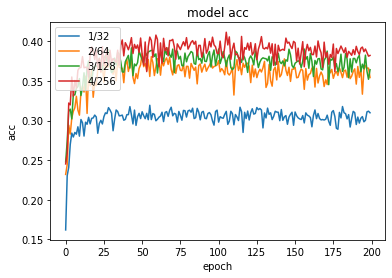

In [6]:
epochs = 200

configs = {'1': [32], '2': [64], '3': [128], '4': [256]}

for n_layers, n_neurons in configs.items():
    model = Sequential()
    model.add(InputLayer(input_shape=(32*32,)))
    for n in n_neurons:
        model.add(Dense(n, activation='relu'))
        model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['acc'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    plt.plot(history.history['val_acc'])
    
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['1/32', '2/64', '3/128', '4/256'], loc='upper left')

Epoch 1/200
391/391 [==============================] - 3s 5ms/step - loss: 2.3272 - acc: 0.1785 - val_loss: 2.1009 - val_acc: 0.2293
Epoch 2/200
391/391 [==============================] - 2s 5ms/step - loss: 2.0461 - acc: 0.2549 - val_loss: 1.9766 - val_acc: 0.3003
Epoch 3/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9895 - acc: 0.2805 - val_loss: 1.9412 - val_acc: 0.3076
Epoch 4/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9591 - acc: 0.2923 - val_loss: 1.9802 - val_acc: 0.2986
Epoch 5/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9331 - acc: 0.3087 - val_loss: 1.8631 - val_acc: 0.3467
Epoch 6/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9079 - acc: 0.3215 - val_loss: 1.8511 - val_acc: 0.3364
Epoch 7/200
391/391 [==============================] - 2s 5ms/step - loss: 1.8851 - acc: 0.3248 - val_loss: 1.8326 - val_acc: 0.3512
Epoch 8/200
391/391 [==============================] - 2s 5ms/step - 

391/391 [==============================] - 2s 5ms/step - loss: 1.6067 - acc: 0.4326 - val_loss: 1.7260 - val_acc: 0.3964
Epoch 63/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5973 - acc: 0.4359 - val_loss: 1.7151 - val_acc: 0.4075
Epoch 64/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6036 - acc: 0.4306 - val_loss: 1.7257 - val_acc: 0.3971
Epoch 65/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5994 - acc: 0.4317 - val_loss: 1.7577 - val_acc: 0.3813
Epoch 66/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6017 - acc: 0.4301 - val_loss: 1.7702 - val_acc: 0.3884
Epoch 67/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5933 - acc: 0.4337 - val_loss: 1.7541 - val_acc: 0.3895
Epoch 68/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6044 - acc: 0.4289 - val_loss: 1.7474 - val_acc: 0.4020
Epoch 69/200
391/391 [==============================] - 2s 5ms/step - loss:

391/391 [==============================] - 2s 5ms/step - loss: 1.4962 - acc: 0.4666 - val_loss: 1.9025 - val_acc: 0.3824
Epoch 124/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5042 - acc: 0.4641 - val_loss: 1.8396 - val_acc: 0.3915
Epoch 125/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5044 - acc: 0.4616 - val_loss: 1.8701 - val_acc: 0.3912
Epoch 126/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5093 - acc: 0.4605 - val_loss: 1.8622 - val_acc: 0.3705
Epoch 127/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4992 - acc: 0.4659 - val_loss: 1.8673 - val_acc: 0.3795
Epoch 128/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5053 - acc: 0.4629 - val_loss: 1.8363 - val_acc: 0.3990
Epoch 129/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4986 - acc: 0.4645 - val_loss: 1.9000 - val_acc: 0.3835
Epoch 130/200
391/391 [==============================] - 2s 5ms/step 

Epoch 184/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4463 - acc: 0.4855 - val_loss: 1.8955 - val_acc: 0.3872
Epoch 185/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4392 - acc: 0.4847 - val_loss: 1.9704 - val_acc: 0.3780
Epoch 186/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4456 - acc: 0.4853 - val_loss: 1.9914 - val_acc: 0.3872
Epoch 187/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4367 - acc: 0.4885 - val_loss: 1.9571 - val_acc: 0.3892
Epoch 188/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4385 - acc: 0.4893 - val_loss: 1.9480 - val_acc: 0.3839
Epoch 189/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4354 - acc: 0.4873 - val_loss: 1.9028 - val_acc: 0.3886
Epoch 190/200
391/391 [==============================] - 2s 5ms/step - loss: 1.4304 - acc: 0.4865 - val_loss: 1.9967 - val_acc: 0.3849
Epoch 191/200
391/391 [==============================] 

391/391 [==============================] - 2s 5ms/step - loss: 1.6610 - acc: 0.4093 - val_loss: 1.6640 - val_acc: 0.4077
Epoch 46/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6560 - acc: 0.4072 - val_loss: 1.6846 - val_acc: 0.3998
Epoch 47/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6598 - acc: 0.4055 - val_loss: 1.6890 - val_acc: 0.4041
Epoch 48/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6512 - acc: 0.4106 - val_loss: 1.6746 - val_acc: 0.4046
Epoch 49/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6566 - acc: 0.4074 - val_loss: 1.6639 - val_acc: 0.4074
Epoch 50/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6518 - acc: 0.4093 - val_loss: 1.6864 - val_acc: 0.3984
Epoch 51/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6427 - acc: 0.4137 - val_loss: 1.7125 - val_acc: 0.3882
Epoch 52/200
391/391 [==============================] - 2s 5ms/step - loss:

Epoch 106/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5742 - acc: 0.4410 - val_loss: 1.6497 - val_acc: 0.4159
Epoch 107/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5736 - acc: 0.4388 - val_loss: 1.7085 - val_acc: 0.4038
Epoch 108/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5843 - acc: 0.4368 - val_loss: 1.6611 - val_acc: 0.4096
Epoch 109/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5679 - acc: 0.4431 - val_loss: 1.7087 - val_acc: 0.4028
Epoch 110/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5775 - acc: 0.4387 - val_loss: 1.6794 - val_acc: 0.4087
Epoch 111/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5788 - acc: 0.4360 - val_loss: 1.6576 - val_acc: 0.4179
Epoch 112/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5806 - acc: 0.4358 - val_loss: 1.6763 - val_acc: 0.4174
Epoch 113/200
391/391 [==============================] 

391/391 [==============================] - 2s 5ms/step - loss: 1.5400 - acc: 0.4494 - val_loss: 1.8650 - val_acc: 0.3965
Epoch 167/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5432 - acc: 0.4453 - val_loss: 1.7191 - val_acc: 0.4103
Epoch 168/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5437 - acc: 0.4509 - val_loss: 1.7214 - val_acc: 0.4073
Epoch 169/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5308 - acc: 0.4515 - val_loss: 1.7104 - val_acc: 0.4086
Epoch 170/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5319 - acc: 0.4520 - val_loss: 1.7300 - val_acc: 0.4127
Epoch 171/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5299 - acc: 0.4528 - val_loss: 1.7002 - val_acc: 0.4181
Epoch 172/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5384 - acc: 0.4504 - val_loss: 1.7310 - val_acc: 0.4040
Epoch 173/200
391/391 [==============================] - 3s 7ms/step 

391/391 [==============================] - 2s 5ms/step - loss: 1.7694 - acc: 0.3700 - val_loss: 1.7692 - val_acc: 0.3771
Epoch 28/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7597 - acc: 0.3684 - val_loss: 1.7480 - val_acc: 0.3796
Epoch 29/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7622 - acc: 0.3744 - val_loss: 1.7315 - val_acc: 0.3836
Epoch 30/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7545 - acc: 0.3701 - val_loss: 1.7439 - val_acc: 0.3784
Epoch 31/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7473 - acc: 0.3776 - val_loss: 1.7285 - val_acc: 0.3852
Epoch 32/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7470 - acc: 0.3731 - val_loss: 1.6914 - val_acc: 0.3998
Epoch 33/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7437 - acc: 0.3763 - val_loss: 1.7271 - val_acc: 0.3747
Epoch 34/200
391/391 [==============================] - 2s 5ms/step - loss:

391/391 [==============================] - 2s 5ms/step - loss: 1.6424 - acc: 0.4147 - val_loss: 1.6816 - val_acc: 0.3972
Epoch 89/200
391/391 [==============================] - 2s 6ms/step - loss: 1.6380 - acc: 0.4177 - val_loss: 1.6457 - val_acc: 0.4050
Epoch 90/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6419 - acc: 0.4138 - val_loss: 1.6540 - val_acc: 0.4049
Epoch 91/200
391/391 [==============================] - 2s 6ms/step - loss: 1.6365 - acc: 0.4152 - val_loss: 1.6525 - val_acc: 0.4132
Epoch 92/200
391/391 [==============================] - 2s 6ms/step - loss: 1.6415 - acc: 0.4173 - val_loss: 1.6403 - val_acc: 0.4118
Epoch 93/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6415 - acc: 0.4154 - val_loss: 1.6367 - val_acc: 0.4173
Epoch 94/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6419 - acc: 0.4133 - val_loss: 1.6855 - val_acc: 0.3870
Epoch 95/200
391/391 [==============================] - 2s 5ms/step - loss:

Epoch 149/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6019 - acc: 0.4275 - val_loss: 1.6716 - val_acc: 0.3916
Epoch 150/200
391/391 [==============================] - 2s 5ms/step - loss: 1.6022 - acc: 0.4315 - val_loss: 1.6423 - val_acc: 0.4132
Epoch 151/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5911 - acc: 0.4364 - val_loss: 1.6789 - val_acc: 0.4063
Epoch 152/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5916 - acc: 0.4329 - val_loss: 1.6451 - val_acc: 0.4171
Epoch 153/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5998 - acc: 0.4305 - val_loss: 1.6588 - val_acc: 0.4048
Epoch 154/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5964 - acc: 0.4324 - val_loss: 1.6491 - val_acc: 0.4154
Epoch 155/200
391/391 [==============================] - 2s 5ms/step - loss: 1.5792 - acc: 0.4388 - val_loss: 1.6249 - val_acc: 0.4224
Epoch 156/200
391/391 [==============================] 

391/391 [==============================] - 2s 5ms/step - loss: 1.9897 - acc: 0.2667 - val_loss: 1.9368 - val_acc: 0.3000
Epoch 10/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9762 - acc: 0.2785 - val_loss: 1.9200 - val_acc: 0.3043
Epoch 11/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9624 - acc: 0.2797 - val_loss: 1.9184 - val_acc: 0.2891
Epoch 12/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9550 - acc: 0.2847 - val_loss: 1.9190 - val_acc: 0.3091
Epoch 13/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9455 - acc: 0.2890 - val_loss: 1.8998 - val_acc: 0.3202
Epoch 14/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9430 - acc: 0.2925 - val_loss: 1.8743 - val_acc: 0.3257
Epoch 15/200
391/391 [==============================] - 2s 5ms/step - loss: 1.9328 - acc: 0.2994 - val_loss: 1.8532 - val_acc: 0.3389
Epoch 16/200
391/391 [==============================] - 2s 5ms/step - loss:

391/391 [==============================] - 2s 5ms/step - loss: 1.7931 - acc: 0.3602 - val_loss: 1.7526 - val_acc: 0.3779
Epoch 71/200
391/391 [==============================] - 2s 6ms/step - loss: 1.7902 - acc: 0.3608 - val_loss: 1.7330 - val_acc: 0.3829
Epoch 72/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7864 - acc: 0.3621 - val_loss: 1.7517 - val_acc: 0.3689
Epoch 73/200
391/391 [==============================] - 2s 6ms/step - loss: 1.7948 - acc: 0.3607 - val_loss: 1.7542 - val_acc: 0.3754
Epoch 74/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7901 - acc: 0.3583 - val_loss: 1.7355 - val_acc: 0.3816
Epoch 75/200
391/391 [==============================] - 2s 6ms/step - loss: 1.7802 - acc: 0.3650 - val_loss: 1.7416 - val_acc: 0.3817
Epoch 76/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7812 - acc: 0.3638 - val_loss: 1.7454 - val_acc: 0.3790
Epoch 77/200
391/391 [==============================] - 2s 5ms/step - loss:

Epoch 131/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7593 - acc: 0.3742 - val_loss: 1.7146 - val_acc: 0.3816
Epoch 132/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7464 - acc: 0.3767 - val_loss: 1.7164 - val_acc: 0.3911
Epoch 133/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7480 - acc: 0.3806 - val_loss: 1.7437 - val_acc: 0.3821
Epoch 134/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7428 - acc: 0.3801 - val_loss: 1.7221 - val_acc: 0.3841
Epoch 135/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7447 - acc: 0.3775 - val_loss: 1.7193 - val_acc: 0.3869
Epoch 136/200
391/391 [==============================] - 2s 6ms/step - loss: 1.7507 - acc: 0.3795 - val_loss: 1.7203 - val_acc: 0.3876
Epoch 137/200
391/391 [==============================] - 2s 6ms/step - loss: 1.7404 - acc: 0.3805 - val_loss: 1.7255 - val_acc: 0.3849
Epoch 138/200
391/391 [==============================] 

391/391 [==============================] - 2s 5ms/step - loss: 1.7287 - acc: 0.3863 - val_loss: 1.7156 - val_acc: 0.3881
Epoch 192/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7253 - acc: 0.3859 - val_loss: 1.7172 - val_acc: 0.3880
Epoch 193/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7194 - acc: 0.3916 - val_loss: 1.7234 - val_acc: 0.3896
Epoch 194/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7223 - acc: 0.3892 - val_loss: 1.7264 - val_acc: 0.3868
Epoch 195/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7262 - acc: 0.3860 - val_loss: 1.7014 - val_acc: 0.3935
Epoch 196/200
391/391 [==============================] - 2s 5ms/step - loss: 1.7280 - acc: 0.3859 - val_loss: 1.7077 - val_acc: 0.3939
Epoch 197/200
391/391 [==============================] - 2s 6ms/step - loss: 1.7266 - acc: 0.3879 - val_loss: 1.7003 - val_acc: 0.3904
Epoch 198/200
391/391 [==============================] - 2s 6ms/step 

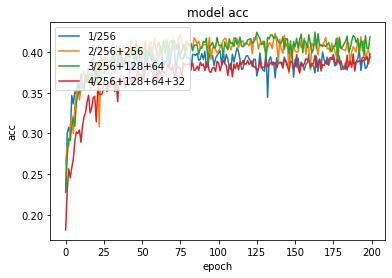

In [7]:
epochs = 200

configs = {'1': [256], '2': [256, 128], '3': [256, 128, 64], 4: [256, 128, 64, 32]}

for n_layers, n_neurons in configs.items():
    model = Sequential()
    model.add(InputLayer(input_shape=(32*32,)))
    for n in n_neurons:
        model.add(Dense(n, activation='relu'))
        model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['acc'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    plt.plot(history.history['val_acc'])
    
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['1/256', '2/256+256', '3/256+128+64', '4/256+128+64+32'], loc='upper left')